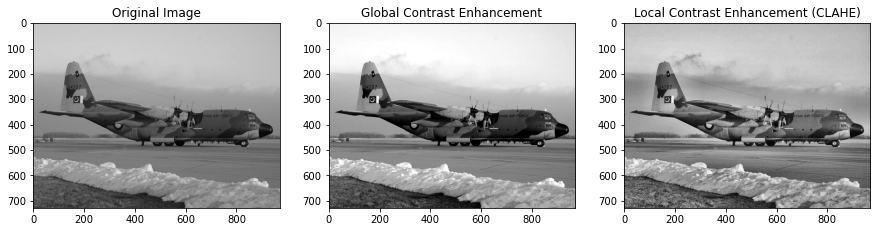

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (grayscale for simplicity)
img = cv2.imread('c130.jpg', cv2.IMREAD_GRAYSCALE)

# ----------------------
# Global Contrast Enhancement
# ----------------------

def global_contrast_stretch(image):
    """Manual contrast stretching approach for more granular control"""
    p_low, p_high = np.percentile(image, (2, 98))  # Adjust percentiles as needed
    img_scaled = np.clip((image - p_low) / (p_high - p_low) * 255, 0, 255)
    return img_scaled.astype(np.uint8) 

img_global = global_contrast_stretch(img.copy())  

# ----------------------
# Local Contrast Enhancement (CLAHE)
# ----------------------

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_local = clahe.apply(img)

# ----------------------
# Visualization
# ----------------------

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[1].imshow(img_global, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Global Contrast Enhancement')
axs[2].imshow(img_local, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Local Contrast Enhancement (CLAHE)')
plt.show() 


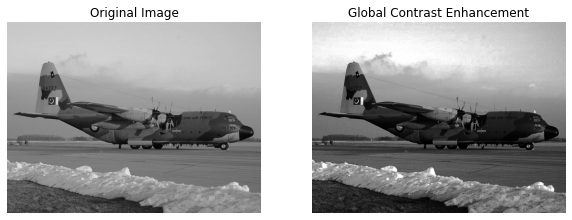

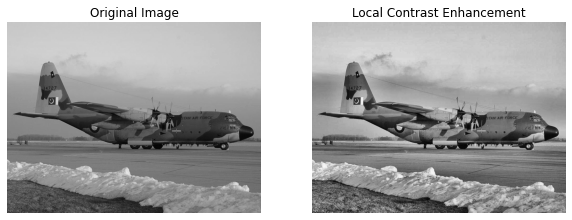

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def global_contrast_enhancement(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply global histogram equalization
    global_enhanced_img = cv2.equalizeHist(img)

    return img, global_enhanced_img

def local_contrast_enhancement(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    local_enhanced_img = clahe.apply(img)

    return img, local_enhanced_img

def visualize_images(original_img, enhanced_img, title):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    image_path = 'c130.jpg'

    # Global Contrast Enhancement
    original_img, global_enhanced_img = global_contrast_enhancement(image_path)
    visualize_images(original_img, global_enhanced_img, 'Global Contrast Enhancement')

    # Local Contrast Enhancement
    original_img, local_enhanced_img = local_contrast_enhancement(image_path)
    visualize_images(original_img, local_enhanced_img, 'Local Contrast Enhancement')


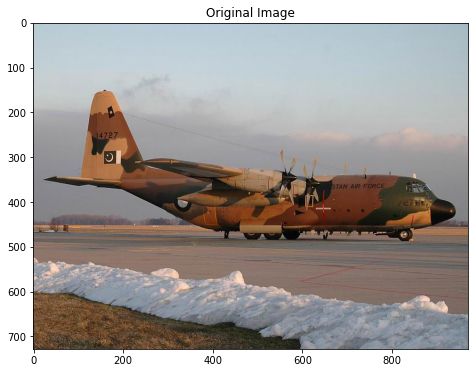

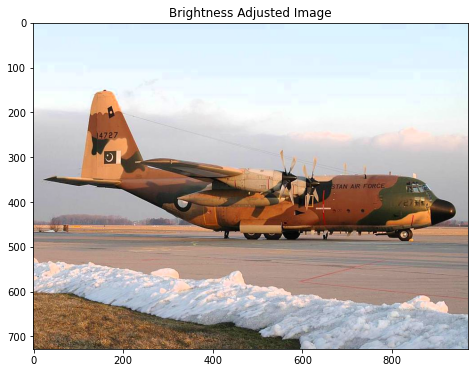

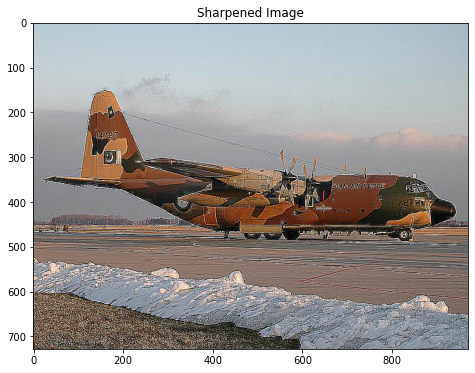

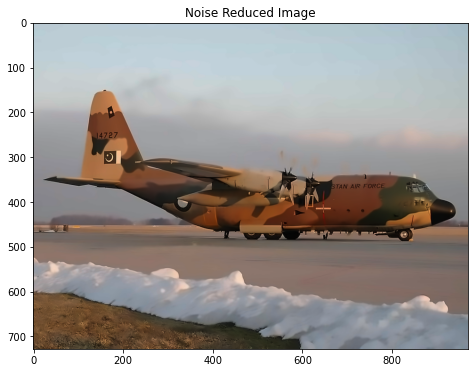

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# **1. Load Image**
img_path = 'c130.jpg'
img = cv2.imread(img_path)

# **Visualization - Original Image**
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.title('Original Image')
plt.show()

# **2. Brightness Adjustment**
def adjust_brightness(image, factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert image to HSV
    hsv[:,:,2] = np.clip(hsv[:,:,2] * factor, 0, 255)  # Adjust 'V' (brightness) 
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

brightened_img = adjust_brightness(img.copy(), 1.3)  # Increase brightness

# **Visualization - Brightness Adjustment**
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(brightened_img, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted Image')
plt.show()

# **3. Sharpening**
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
sharpened_img = cv2.filter2D(img.copy(), -1, kernel)

# **Visualization - Sharpening**
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.show()

# **4. Noise Reduction**
denoised_img = cv2.fastNlMeansDenoisingColored(img.copy(), None, 10, 10, 7, 21)

# **Visualization - Noise Reduction**
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Noise Reduced Image')
plt.show()



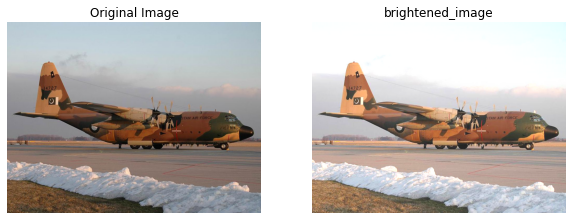

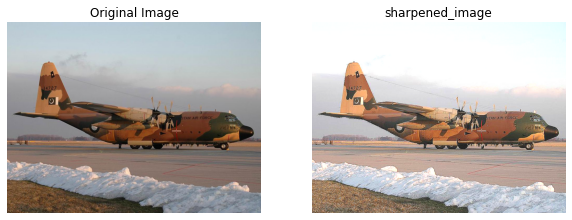

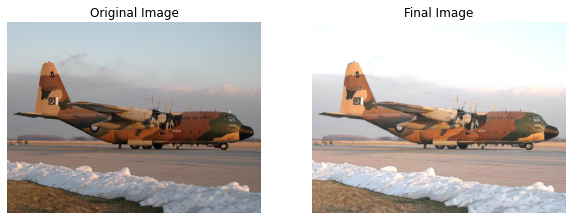

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness(image, alpha=1.0, beta=0):
    """
    Adjust the brightness of an image.
    :param image: Input image
    :param alpha: Contrast control (1.0-3.0)
    :param beta: Brightness control (0-100)
    :return: Brightness adjusted image
    """
    # Convert to float to prevent clipping and loss of info when increasing brightness.
    brightened_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return brightened_image

def sharpen_image(image):
    """
    Apply a sharpening filter to the image.
    :param image: Input image
    :return: Sharpened image
    """
    # Sharpening kernel, emphasizes edges.
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

def reduce_noise(image):
    """
    Apply noise reduction to the image.
    :param image: Input image
    :return: Image with reduced noise
    """
    # Using GaussianBlur for noise reduction
    noise_reduced_image = cv2.GaussianBlur(image, (5, 5), 0)
    return noise_reduced_image

def plot_images(original, modified, title):
    """
    Plot the original and modified images side by side.
    :param original: Original image
    :param modified: Modified image
    :param title: Title for the subplot
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

    plt.show()

# Load the image
image = cv2.imread('c130.jpg')

# Adjust brightness
brightened_image = adjust_brightness(image, alpha=1.2, beta=30)
plot_images(image, brightened_image, 'brightened_image')

# Sharpen the image
sharpened_image = sharpen_image(brightened_image)
plot_images(image, sharpened_image, 'sharpened_image')
# Reduce noise
final_image = reduce_noise(sharpened_image)

# Plot the original and final images
plot_images(image, final_image, 'Final Image')


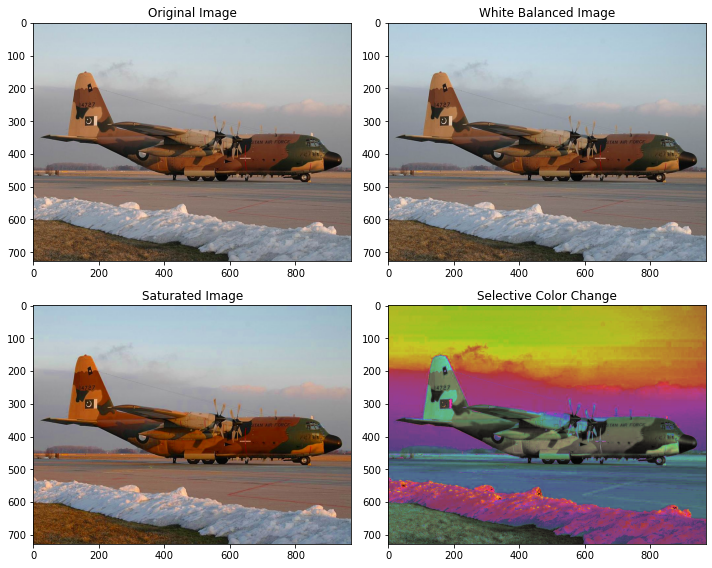

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Helper Functions ---

def selective_color_change(image, target_color, replacement_color, tolerance=30):
    """Replaces a target color with a replacement color within a tolerance range"""
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower = np.array([target_color[0] - tolerance, target_color[1], target_color[2]])
    upper = np.array([target_color[0] + tolerance, 255, 255])

    mask = cv2.inRange(hsv_image, lower, upper)
    result = image.copy()
    result[mask > 0] = replacement_color

    return cv2.cvtColor(result, cv2.COLOR_HSV2BGR)

# --- Load the Image ---
image = cv2.imread('c130.jpg')

# --- White Balance ---
def simple_white_balance(image):
    b, g, r = cv2.split(image)
    b_mean, g_mean, r_mean = cv2.mean(b)[0], cv2.mean(g)[0], cv2.mean(r)[0]
    k = (b_mean + g_mean + r_mean) / 3
    kb, kg, kr = k / b_mean, k / g_mean, k / r_mean
    b = cv2.addWeighted(src1=b, alpha=kb, src2=0, beta=0, gamma=0)
    g = cv2.addWeighted(src1=g, alpha=kg, src2=0, beta=0, gamma=0)
    r = cv2.addWeighted(src1=r, alpha=kr, src2=0, beta=0, gamma=0)
    return cv2.merge([b, g, r])

white_balanced = simple_white_balance(image)

# --- Color Saturation ---
def adjust_saturation(image, saturation_factor):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)
    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

saturated_image = adjust_saturation(image, 1.5) 

# --- Selective Color Change ---
target_color = [0, 0, 255]   # Blue (in HSV) - Change this as needed
replacement_color = [255, 0, 0] # Red
selective_color_image = selective_color_change(image, target_color, replacement_color)

# --- Visualization with Matplotlib ---
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(white_balanced, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('White Balanced Image')

axs[1, 0].imshow(cv2.cvtColor(saturated_image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Saturated Image')

axs[1, 1].imshow(cv2.cvtColor(selective_color_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Selective Color Change')

plt.tight_layout()
plt.show()


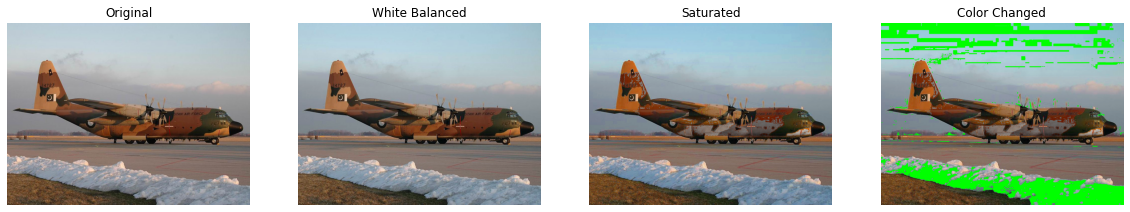

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2RGB)
    return result

wb_image = white_balance(original_image)
def adjust_saturation(img, saturation_scale=1.5):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hsv_img[:, :, 1] = hsv_img[:, :, 1] * saturation_scale
    hsv_img[:, :, 1] = np.clip(hsv_img[:, :, 1], 0, 255)
    return cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

saturated_image = adjust_saturation(wb_image)
def change_color(img, target_color_range, new_color):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_bound, upper_bound = target_color_range
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
    img[mask > 0] = new_color
    return img

# Example: Changing blues to a shade of green
blue_range = (np.array([100, 50, 50]), np.array([130, 255, 255]))  # HSV range for blue
new_blue_color = [0, 255, 0]  # RGB for green
color_changed_image = change_color(saturated_image.copy(), blue_range, new_blue_color)
def visualize_images(images, titles):
    plt.figure(figsize=(20, 10))
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, len(images), i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

visualize_images([original_image, wb_image, saturated_image, color_changed_image],
                 ['Original', 'White Balanced', 'Saturated', 'Color Changed'])


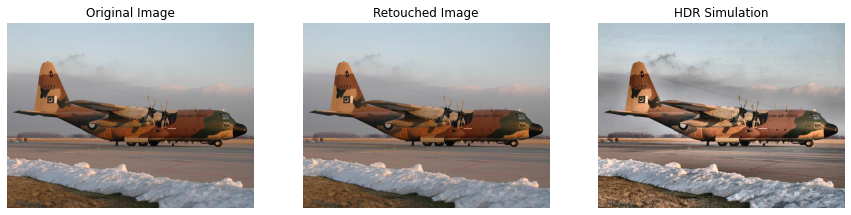

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Frequency Separation
def frequency_separation(image, sigma=3):
    low_freq = cv2.GaussianBlur(image, (0, 0), sigma)
    high_freq = cv2.subtract(image, low_freq)
    return low_freq, high_freq

low_freq, high_freq = frequency_separation(image)

# Blemish Removal - Manually identify blemish locations or use automated detection
# For demonstration, let's assume a blemish at (x, y) and radius
blemish_x, blemish_y, radius = 50, 50, 10  # Example values
inpaint_mask = np.zeros(image.shape[:2], np.uint8)
cv2.circle(inpaint_mask, (blemish_x, blemish_y), radius, 255, -1)
image_retouched = cv2.inpaint(image, inpaint_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Wrinkle Reduction - Similar to blemish removal but with selective blurring
# Assuming a wrinkle area, for demonstration
wrinkle_area = image_retouched[40:80, 40:80]  # Example values
wrinkle_area_blurred = cv2.GaussianBlur(wrinkle_area, (0, 0), sigmaX=2)
image_retouched[40:80, 40:80] = wrinkle_area_blurred

# HDR Simulation - Using CLAHE
def simulate_hdr(image):
    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE to the L-channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    
    # Convert back to RGB
    final = cv2.cvtColor(limg, cv2.COLOR_Lab2BGR)
    return final

image_hdr = simulate_hdr(image_retouched)

# Visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(image_retouched, cv2.COLOR_BGR2RGB))
axs[1].set_title('Retouched Image')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(image_hdr, cv2.COLOR_BGR2RGB))
axs[2].set_title('HDR Simulation')
axs[2].axis('off')

plt.show()


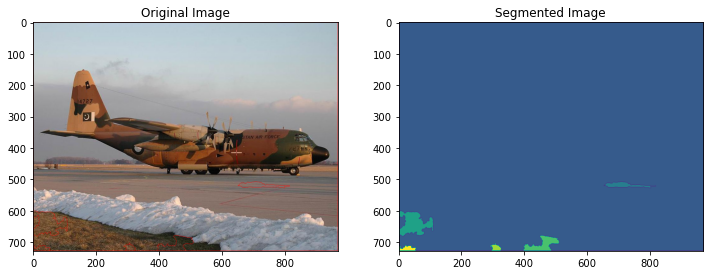

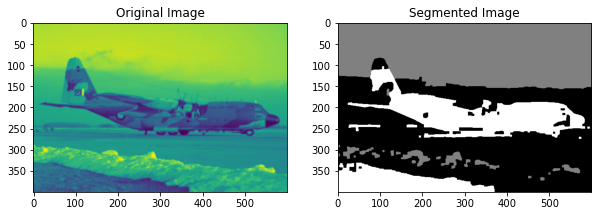

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# *** 1. Image Loading and Preprocessing ***
def load_and_preprocess(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize if desired
    resized = cv2.resize(gray, (600, 400)) 

    # Blur 
    blur = cv2.GaussianBlur(resized, (5, 5), 0) 

    # Convert to 32-bit float for K-means
    return blur.astype(np.float32) 


# *** 2. K-Means Clustering ***
def kmeans_segmentation(image, n_clusters=3):
    vectorized = image.reshape((-1, 1))
    kmeans = cv2.kmeans(vectorized, n_clusters, None, (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), 10, cv2.KMEANS_RANDOM_CENTERS)
    # Correctly extract labels
    _, labels, _ = kmeans 
    segmented = labels.reshape(image.shape[:2]) 
    return segmented


# *** 3. Morphological Operations ***
def refine_with_morphology(image):
    kernel = np.ones((3, 3), np.uint8)

    # Option 1: Convert to uint8
    image_uint8 = image.astype(np.uint8)
    opening = cv2.morphologyEx(image_uint8, cv2.MORPH_OPEN, kernel, iterations=2)  
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)  
    return closing

# *** 4. Edge Detection ***
def detect_edges(image):
    canny = cv2.Canny(image, 100, 200)
    return canny

# *** 5. Region Merging (replace with your sophisticated merging algorithm) ***
def merge_regions(image, edges):
    # Placeholder - Implement a region merging algorithm based on edges 
    # and other criteria (e.g., proximity, color similarity)
    return image 

# *** 6. Visualization***
def visualize(original, segmented):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(original)
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(segmented, cmap='gray')
    plt.title("Segmented Image")
    plt.show()

# --------------------------
# Main Execution
# --------------------------
image_path = 'c130.jpg'
original_img = load_and_preprocess(image_path)

segmented_kmeans = kmeans_segmentation(original_img)
refined = refine_with_morphology(segmented_kmeans)
edges = detect_edges(refined)
final_segmented = merge_regions(refined, edges)

visualize(original_img, final_segmented) 


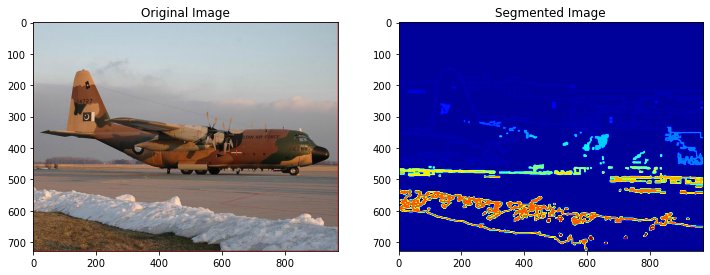

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Could not open or find the image.")

# Convert to a different color space, if necessary (e.g., RGB to HSV)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use the Hue channel or any other channel that might be of interest
hue_channel = hsv[:, :, 0]

# Use a threshold or an edge detector
# For instance, using the Canny edge detector
edges = cv2.Canny(hue_channel, threshold1=60, threshold2=180)

# Use morphological closing to close small gaps in the edges
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find sure foreground by applying a dilation
sure_fg = cv2.dilate(closing, kernel, iterations=2)

# Finding sure background area (this might need to be adjusted)
sure_bg = cv2.erode(closing, kernel, iterations=3)

# Finding unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(image, markers)

# Put red color boundaries in the original image for segmented boundaries
image[markers == -1] = [0, 0, 255]

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='jet') # Using a colormap to differentiate segments
plt.title('Segmented Image')
plt.show()


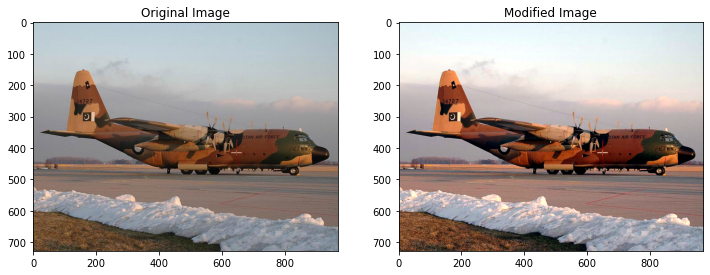

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def display_images(original_image, modified_image, titles=("Original Image", "Modified Image")):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)) 
    ax1.set_title(titles[0])
    ax2.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
    ax2.set_title(titles[1])
    plt.show()

image_path = 'c130.jpg'
original_img = cv2.imread(image_path)
def select_region(image):
    # Convert to grayscale for simplified selection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to isolate a preliminary region (adjust as needed)
    ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # Morphological operations for refinement (optional)
    kernel = np.ones((5, 5), np.uint8)  
    thresh = cv2.erode(thresh, kernel, iterations=2)  
    thresh = cv2.dilate(thresh, kernel, iterations=3) 

    # Find contours to approximate the region of interest
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour (assuming it corresponds to your desired region)
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask 
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [largest_contour], -1, 255, -1)

    return mask

mask = select_region(original_img.copy())  
def complex_enhancement(image, mask):
    # Split into color channels
    b, g, r = cv2.split(image)

    # --- YOUR COMPLEX ENHANCEMENT LOGIC HERE ---
    # Example: Contrast stretching and selective saturation boost
    def stretch_contrast(channel):
        p2, p98 = np.percentile(channel, (2, 98))
        return np.clip((channel - p2) * 255 / (p98 - p2), 0, 255).astype(np.uint8)

    b = stretch_contrast(b) 
    g = stretch_contrast(g)
    r = stretch_contrast(r)

    # Increase saturation within the mask
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[..., 1] = np.where(mask == 255, hsv[..., 1] * 1.5, hsv[..., 1])
    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    # --------------------------------------------

    return cv2.merge((b, g, r))

enhanced_img = complex_enhancement(original_img.copy(), mask)
display_images(original_img, enhanced_img)
